Given a piece of time-series or other longitutidnal data, it can be useful for plotting purposes to produce a smoothed vector containing values obtained through some form of averaging.

A popular way to do this is a simple moving average, where each value is simply the unweighted average within a given window of size k starting at time t:

$$
\text{MA(x, t, k)} = \sum_t^{t + k}x_t
$$

In aggregate, for a vector x of length N this produces a new smoothed vector of length x - N + 1.

However, this approach neglects the fact that data further back in time from the end of the window may be less informative, and should be downweighted when computing an average.

This problem can be solved with the **exponentially weighted moving average (EWMA)**, where we choose a smoothing parameter $\beta$ which determines the importance of past vs future data when computing the average.

At a given time t and for a smoothing parameter $\beta$ in the range (0, 1) exlcusive, the EWMA is computed as follows:

$$
\mu_t = \beta\mu_{t-1} + (1 - \beta)y_t
$$

A higher value of $\beta$ results in greater weight being placed on past values and reduced 'forgetting', while a low value does the opposite - it places more emphasis on recent values.

In this notebook I demonstrate a simple implementation of EWMA and show its output for a series of $\beta$ values over some synthetic time-series data.

In [38]:
import numpy as np
import matplotlib.pyplot as plt

Text(0.5, 1.0, 'Synthetic time series data generated by linear trend + gaussian noise')

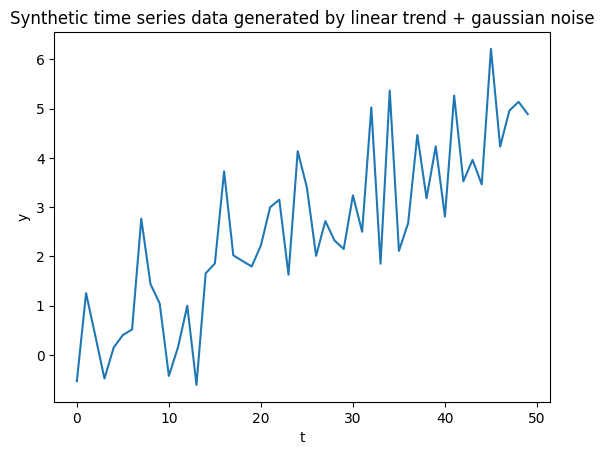

In [39]:
# generate synthetic data
data = np.zeros(shape=(50,)) + 2

generator = np.random.default_rng(seed=1738)

delta = .1
noise_mean = 0
noise_std = 1

for i in range(len(data)):        
    data[i] = generator.normal(loc=noise_mean, scale=noise_std) + (delta * i)

plt.plot(data)
plt.xlabel('t')
plt.ylabel('y')
plt.title('Synthetic time series data generated by linear trend + gaussian noise')

In [40]:
def ewma(x: np.ndarray, beta: float = .8) -> np.ndarray:
    """Compute exponentially-weighted moving average over a 1-D vector x with smoothing factor beta

    Args:
        x (np.ndarray): input vector over which to computer a moving average
        beta (float, optional): smoothing factor. Must be in the range (0, 1) exclusive. Higher values result in reduced forgetting
        of previous data, while lower values allow for quicker adaptation to new dats. Defaults to .8.

    Raises:
        ValueError: if beta is not a float in the range (0, 1) exclusive
        ValueError: if x is not a 1-D numpy array

    Returns:
        np.ndarray: 1-D numpy array of the same size as x representing the exponentially-weighted moving average 
    """
    if not isinstance(beta, float) or beta <= 0 or beta >= 1:
        raise ValueError(f'beta must be a float in the range (0, 1) exclusive. Instead got {beta}')
    
    if not isinstance(x, np.ndarray) or x.ndim > 1:
        raise ValueError('x must be a 1-D numpy array')

    out = np.zeros_like(x)

    for i in range(len(out)):
        if i != 0:
            out[i] = (beta * x[i - 1])

        out[i] += (1 - beta) * x[i]
    
    return out

Text(0.5, 0.92, 'Exponentially Weighted Moving Average for Synthetic Data With Different β Values ')

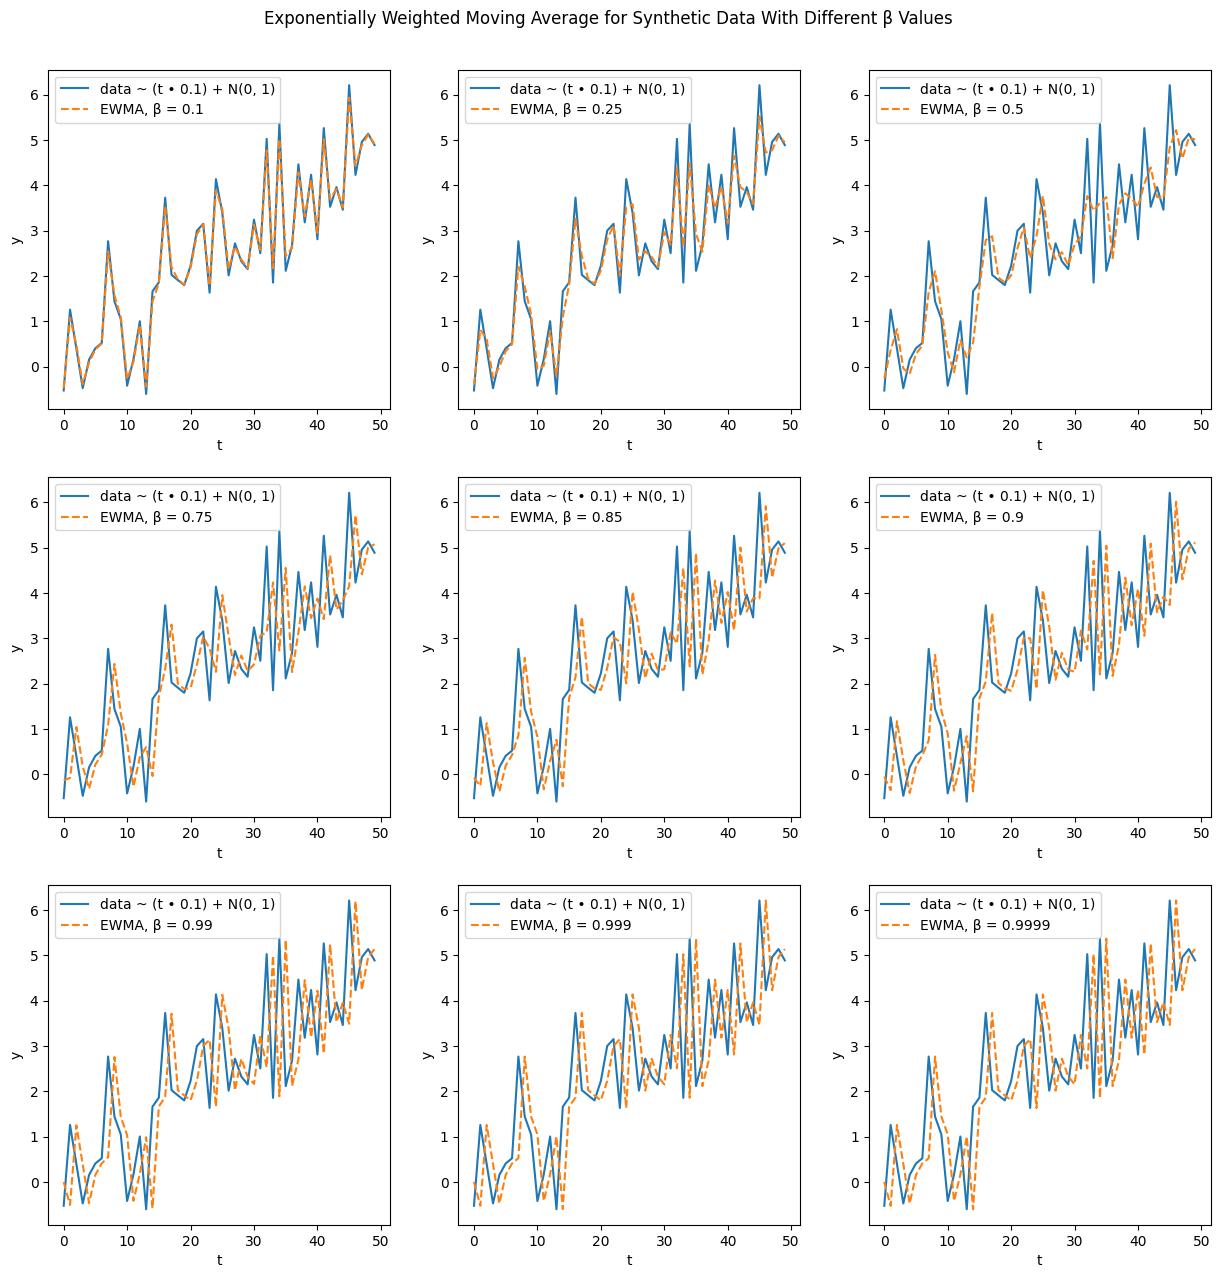

In [41]:
# plot EWMA result for different smoothing factors
betas = [.1, .25, .5, .75, .85, .9, .99, .999, .9999]

fig, ax = plt.subplots(ncols=3, nrows=3, figsize=(15, 15))

for i in range(len(betas)):
    this_ax = ax[i // 3, i % 3]

    beta = betas[i]

    out = ewma(data, beta)

    this_ax.plot(data, label=f'data ~ (t • {delta}) + N({noise_mean}, {noise_std})')
    this_ax.plot(out, label=f'EWMA, β = {beta}', linestyle='--')
    this_ax.set_xlabel('t')
    this_ax.set_ylabel('y')
    this_ax.legend()

fig.suptitle('Exponentially Weighted Moving Average for Synthetic Data With Different β Values ', y=.92)